# Audio

> Material adaptado de [Real Python](https://realpython.com) ["Playing and Recording Sound in Python"](https://realpython.com/playing-and-recording-sound-python/) -  [Joska de Langen](https://realpython.com/team/jdelangen/)

## Índice 

* [Nociones básicas de audio](#Nociones-básicas-de-audio)
    * [Hagamos algunas cuentas](#Hagamos-algunas-cuentas)
    * [¿Qué es muestreo y frecuencia de muestreo?](#¿Qué-es-muestreo-y-frecuencia-de-muestreo?)
* [Reproducción de archivos de audio](#Reproducción-de-archivos-de-audio)
    * [simpleaudio](#simpleaudio)
    * [python-sounddevice](#python-sounddevice)
    * [pydub](#pydub)
    * [pyaudio](#pyaudio)
        * [PortAudio](#PortAudio)
    * [scipy+jupyter](#scipy-+-jupyter)
* [Grabación de archivos de audio](#Grabacion-de-archivos-de-audio)
    * [python-sounddevice + scipy](#python-sounddevice-+-scipy)
    * [pyaudio + wave](#pyaudio-+-wave)
* [Referencias](#Referencias)
* [Licencia](#Licencia)

## Objetivos del notebook 

* Introducir a nociones básicas de audio.
* Conocer las principales librerias para trabajar con audio en python.
* Reproducir archivos WAV y MP3.
* Reproducir matrices NumPy que contiene una secuencia.
* Grabar sonido usando Python.

> Una lista completa de las bibliotecas de Python relacionadas con el audio, en la [página wiki sobre audio en Python](https://wiki.python.org/moin/Audio/) .

## Nociones básicas de audio

Los extractos de sonido son archivos de audio digital en formato .wav. Las ondas sonoras se digitalizan muestreándolas a intervalos discretos conocidos como frecuencia de muestreo (normalmente 44,1 kHz para audio con calidad de CD, lo que significa que las muestras se toman 44,100 veces por segundo).

Cada muestra es la amplitud de la onda en un intervalo de tiempo particular, donde la profundidad de bits determina qué tan detallada será la muestra, también conocida como el rango dinámico de la señal (normalmente 16 bits, lo que significa que una muestra puede variar entre 65.536 valores de amplitud).

### Hagamos algunas cuentas

Esto significa que la canción se describe digitalmente en modulación de código de pulso ([PCM](https://es.wikipedia.org/wiki/Audio_digital)) por casi 16 millones de números (3 [ minutos ] x 60 [ segundos ] x 2 [ canales estéreo ] x 44100 [ frecuencia de muestreo]). Esta información requiere 30 MB de memoria y una cantidad considerable de tiempo para procesarse. Procesar la pequeña cantidad de 100 pistas, que se relaciona con aproximadamente 10 CD de audio, requeriría alrededor de 3 GB de memoria, que actualmente es aproximadamente el tamaño promedio de memoria que se proporciona en las computadoras personales. Procesar 100000 canciones requeriría 3 TB de memoria, lo que requiere vastos recursos (por ejemplo, adquisición, alojamiento, consumo de energía, etc.) y solo es adecuado para entornos académicos o industriales.

### ¿Qué es muestreo y frecuencia de muestreo?

En el procesamiento de señales, el muestreo es la reducción de una señal continua en una serie de valores discretos. La frecuencia o tasa de muestreo es el número de muestras tomadas durante un período de tiempo fijo. Una frecuencia de muestreo alta da como resultado una menor pérdida de información pero un mayor gasto computacional, y las frecuencias de muestreo bajas tienen una mayor pérdida de información pero son rápidas y económicas de calcular. 

A continuación una onda de sonido, en rojo, representada digitalmente, en azul (después del muestreo y la cuantificación de 4 bits), con la matriz (secuencia) resultante mostrada a la derecha. 

![](../img/audio_digitalizacion.png)


El sonido se representa en forma de una señal de audio con parámetros como frecuencia, ancho de banda, decibelios, etc. Una señal de audio típica se puede expresar en función de la amplitud y el tiempo.

![](../img/audio_tiempo_frecuencia.png)

Hay dispositivos construidos que ayudan a adquirir estos sonidos y representarlos en un formato legible por computadora. Ejemplos de estos formatos son

* Formato wav (archivo de audio de forma de onda)
* Formato mp3 (MPEG-1 Audio Layer 3)
* Formato WMA (Windows Media Audio)

Un proceso de procesamiento de audio típico implica la extracción de características acústicas relevantes para la tarea en cuestión, seguida de esquemas de toma de decisiones que involucran detección, clasificación y fusión de conocimientos. Afortunadamente, tenemos algunas bibliotecas de Python útiles que facilitan esta tarea.


## Reproducción de archivos de audio

A continuación, se verá cómo reproducir archivos de audio con una selección de bibliotecas de Python. Algunas de estas bibliotecas le permiten reproducir una variedad de formatos de audio, incluidos arreglos MP3 y NumPy. Todas las bibliotecas a continuación le permiten reproducir archivos WAV, algunas con algunas líneas de código más que otras:

* **simpleaudio** permite reproducir archivos WAV y matrices NumPy, y le ofrece opciones para comprobar si un archivo todavía se está reproduciendo.

* **python-sounddevice** y **pyaudio** proporcionar enlaces para la biblioteca [PortAudio](http://www.portaudio.com/) para la reproducción multiplataforma de archivos WAV.

* **pydub** requiere pyaudio para la reproducción de audio, pero si está ffmpeg instalado, le permite reproducir una amplia gama de formatos de audio con solo unas pocas líneas de código.

* **scipy + jupyter** no es una libreria especifica de audio, pero tiene metodos para leer archivos WAV.

### simpleaudio

``` bash
 pip install simpleaudio
```

[Documentación](https://simpleaudio.readthedocs.io/en/latest/installation.html)

Es una biblioteca multiplataforma para la reproducción de archivos WAV (mono y estéreo) sin dependencias. El siguiente código se puede utilizar para reproducir un archivo WAV y esperar a que el archivo termine de reproducirse antes de finalizar el script:

In [ ]:
import simpleaudio as sa

filename = '../audio/clarinete.wav'
wave_obj = sa.WaveObject.from_wave_file(filename)
play_obj = wave_obj.play()
play_obj.wait_done()  # Wait until sound has finished playing

Los archivos WAV contienen una secuencia de bits que representan los datos de audio sin procesar, así como encabezados con metadatos en [formato RIFF](https://es.wikipedia.org/wiki/Resource_Interchange_File_Format) (formato de archivo de intercambio de recursos). Para conocer detalles respecto a como se forman estos archivos ir al [siguiente link](https://www.tactilemedia.com/info/MCI_Control_Info.html).

Para las grabaciones de CD, el estándar de la industria es almacenar cada muestra de audio (una secuencia de datos de audio individual relacionado con la presión del aire) como un valor de 16 bits , a 44100 muestras por segundo.

Para reducir el tamaño del archivo, puede ser suficiente almacenar algunas grabaciones (por ejemplo, del habla humana) a una frecuencia de muestreo más baja, como 8000 muestras por segundo, aunque esto significa que es posible que las frecuencias de sonido más altas no se representen con tanta precisión.

Ahora vamos a usar la libreria [**wave**](https://docs.python.org/3/library/wave.html) para leer los metadatos:

In [ ]:
import simpleaudio as sa
import wave

wave_read = wave.open('../audio/clarinete.wav', 'rb')
audio_data = wave_read.readframes(wave_read.getnframes())
num_channels = wave_read.getnchannels()
bytes_per_sample = wave_read.getsampwidth()
sample_rate = wave_read.getframerate()

play_obj = sa.play_buffer(audio_data, num_channels, bytes_per_sample, sample_rate)
play_obj.wait_done()



Algunas de las bibliotecas reproducen y graban **bytes objetos**, mientras que otras usan **matrices NumPy** para almacenar datos de audio sin procesar. Ambos corresponden a una secuencia de puntos de datos que se pueden reproducir a una frecuencia de muestreo específica para reproducir un sonido. 

> Para un bytes objeto, cada muestra se almacena como un conjunto de dos valores de 8 bits, mientras que en una matriz NumPy, cada elemento puede contener un valor de 16 bits correspondiente a una sola muestra.

Una diferencia importante entre estos dos tipos de datos es que los **bytes objetos son inmutables**, mientras que los **arreglos NumPy son mutables**, lo que hace que este último sea más adecuado para generar sonidos y para un procesamiento de señales más complejo. 

A continuación, verá cómo generar una matriz NumPy correspondiente a un tono de 440 Hz y reproducirlo usando simpleaudio.play_buffer():

In [ ]:
import numpy as np
import simpleaudio as sa

frequency = 440  # Our played note will be 440 Hz
fs = 44100  # 44100 samples per second
seconds = 3  # Note duration of 3 seconds

# Generate array with seconds*sample_rate steps, ranging between 0 and seconds
t = np.linspace(0, seconds, seconds * fs, False)

# Generate a 440 Hz sine wave
note = np.sin(frequency * t * 2 * np.pi)

# Asegúrese de que el valor más alto esté en el rango de 16 bits (normalizado)
audio = note * (2**15 - 1) / np.max(np.abs(note))
# Convert to 16-bit data
audio = audio.astype(np.int16)

# Start playback
play_obj = sa.play_buffer(audio, 1, 2, fs) # audio_data, num_canales, bytes

# Wait for playback to finish before exiting
play_obj.wait_done()


### python-sounddevice

``` bash
 pip install sounddevice
```

[Documentación](https://python-sounddevice.readthedocs.io/en/latest/)

Proporciona enlaces para la biblioteca PortAudio y algunas funciones de conveniencia para reproducir y grabar matrices NumPy que contienen señales de audio. 

In [ ]:
import sounddevice as sd
import soundfile as sf

filename = '../audio/output.wav'
# Extract data and sampling rate from file
data, fs = sf.read(filename, dtype='float32')  
sd.play(data, fs)
status = sd.wait()  # Wait until file is done playing

In [96]:
import sounddevice as sd
import soundfile as sf

def reproducir (filename):
    'Función para reproducir audio'

    # Extract data and sampling rate from file
    data, fs = sf.read(filename, dtype='float32')  
    sd.play(data, fs)
    status = sd.wait()  # Wait until file is done playing
    return data

La línea que contiene sf.read() extrae los datos de audio sin procesar, así como la frecuencia de muestreo del archivo almacenada en su encabezado RIFF, y sounddevice.wait() asegura que la secuencia de comandos solo finalice después de que el sonido termine de reproducirse.

### pydub

``` bash
 pip install pydub
```

[Documentación](https://www.github.com/jiaaro/pydub)

Aunque pydubpuede abrir y guardar archivos WAV sin dependencias, necesita tener instalado un paquete de reproducción de audio para reproducir **simpleaudio**.

In [85]:
from pydub import AudioSegment
from pydub.playback import play

sound = AudioSegment.from_wav('../audio/clarinete.wav')
play(sound)

Para reproducir otros tipos de audio, como archivos MP3, ffmpeg o libav debería estar instalado:

``` bash
 pip install ffmpeg-python
```

In [86]:
from pydub import AudioSegment
from pydub.playback import play

sound = AudioSegment.from_mp3('../audio/clarinete.mp3')
play(sound)

> En caso de arrojar algun error por falta de ffmpeg, instalarlo. Por ejemplo en linux: `apt install -y ffmpeg`

pydub ofrece más herramientas para trabajar con audio en el siguiente [link](https://github.com/jiaaro/pydub/blob/master/API.markdown)

### pyaudio

``` bash
 pip install pyaudio
```

[Documentación](https://people.csail.mit.edu/hubert/pyaudio)

Proporciona enlaces a PortAudio, la biblioteca de E / S de audio multiplataforma. Esto significa que puede usar pyaudio para reproducir y grabar audio en una variedad de plataformas, incluidas Windows, Linux y Mac. Con pyaudio, la reproducción de audio se realiza escribiendo en .Stream:

In [ ]:
import pyaudio
import wave

filename = '../audio/clarinete.wav'

# Set chunk size of 1024 samples per data frame
chunk = 1024  

# Open the sound file 
wf = wave.open(filename, 'rb')

# Create an interface to PortAudio
p = pyaudio.PyAudio()

# Open a .Stream object to write the WAV file to
# 'output = True' indicates that the sound will be played rather than recorded
stream = p.open(format = p.get_format_from_width(wf.getsampwidth()),
                channels = wf.getnchannels(),
                rate = wf.getframerate(),
                output = True)

# Read data in chunks
data = wf.readframes(chunk)

# Play the sound by writing the audio data to the stream
while data != '':
    stream.write(data)
    data = wf.readframes(chunk)

# Close and terminate the stream
stream.close()
p.terminate()


Debido a que pyaudio brinda más control de bajo nivel, es posible obtener y establecer parámetros para los dispositivos de entrada y salida, verificar la carga de la CPU y la latencia de entrada o salida.

También permite reproducir y grabar audio en el modo **callback**, donde se llama a una función específica cuando se requieren nuevos datos para la reproducción o están disponibles para la grabación. Estas opciones hacen de pyaudio una biblioteca adecuada para usar si sus necesidades de audio van más allá de la simple reproducción.

#### PortAudio

PortAudio proporciona una interfaz de programación de aplicaciones (API) uniforme en todas las plataformas compatibles. Puede pensar en la biblioteca PortAudio como un contenedor que convierte las llamadas a la API de PortAudio en llamadas a las API de audio nativas específicas de la plataforma. Los sistemas operativos a menudo ofrecen más de una API de audio nativa y algunas API (como JACK) pueden estar disponibles en varios sistemas operativos de destino. PortAudio admite todas las principales API de audio nativas en cada plataforma compatible. El diagrama a continuación ilustra la relación entre su aplicación, PortAudio y las API de audio nativas compatibles:

![](../img/portaudio.png)

PortAudio proporciona una interfaz uniforme para las API de audio nativas. Sin embargo, no siempre proporciona una funcionalidad totalmente uniforme. Hay casos en los que PortAudio está limitado por las capacidades de la API de audio nativa subyacente. Por ejemplo, PortAudio no proporciona conversión de frecuencia de muestreo si solicita una frecuencia de muestreo que no es compatible con la API de audio nativa. Otro ejemplo es que ASIO SDK solo permite abrir un dispositivo a la vez, por lo que PortAudio / ASIO no admite actualmente la apertura de varios dispositivos ASIO simultáneamente.

### scipy + jupyter

``` bash
 pip install scipy
```

[Documentación - IO - WAV](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.html)

In [ ]:
# Example: Reading audio file with scipy.io
audioFileName = "../audio/clarinete.wav"
from scipy.io import wavfile

# Output fs: Frequency sample and data: Audio signal -> int16
fs, audiodata = wavfile.read(audioFileName)
print('AudioFile = {}, Sample Rate = {} [Samples/Sec], Wav format = {}, Samples = {}, length = {}'.format(audioFileName,fs,audiodata.dtype,audiodata.shape[0],audiodata.shape[0]/fs))

# For play audio in Jupyter Notebook
import IPython.display as ipd #Ipython functions for jupyter
ipd.Audio(audioFileName) # play audio directly in a Jupyter notebook.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def visualizar (audioData,fs):
    '''
        Funcion para visualizar audio
    '''

    length = audioData.shape[0] / fs
    t = np.linspace(0., length, audioData.shape[0])
    #t = np.arange(0, len(audioData), 1)/ fs
    
    plt.rcParams['figure.figsize'] = (15, 5) # set plot size
    #plt.plot(t, audioData)
    plt.plot(t, audioData / (2.**15))
   
    plt.title('Audio Waveform',size=16);
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Amplitud [int16]")

In [ ]:
visualizar(audiodata,fs)

## Grabacion de archivos de audio

* **python-sounddevice + scipy** almacena las secuencias en matrices Numpy. Facilmente convertida a WAV con scipy.
* **pyaudio** almacena las secuencias en objetos bytes. Facilmente convertida a WAV con scipy.

### python-sounddevice + scipy

permite grabar audio desde su micrófono y almacenarlo como una matriz NumPy. Este es un tipo de datos útil para el procesamiento de sonido que se puede convertir a formato WAV para su almacenamiento utilizando el scipy.io.wavfilemódulo. Asegúrese de instalar el scipymódulo para el siguiente ejemplo ( pip install scipy). Esto instala automáticamente NumPy como una de sus dependencias:

In [ ]:
import sounddevice as sd
from scipy.io.wavfile import write

fs = 44100  # Sample rate
seconds = 3  # Duration of recording

filename = '../audio/output.wav'
myrecording = sd.rec(int(seconds * fs), samplerate=fs, channels=1)
sd.wait()  # Wait until recording is finished
write(filename, fs, myrecording)  # Save as WAV file 

In [ ]:
filename = '../audio/output.wav'
reproducir(filename)

Crear un archivo desde una secuencia sintetizada.

In [ ]:
import numpy as np


filename = '../audio/output.wav'

# Definición de los periodos de muestreo [s]
t_final = 2;
F = 44100; 
T1 = 1/F;

# Definicion de la cantindad de muestras en funcion de T
n = np.linspace(0., 1., samplerate)
amplitude = np.iinfo(np.int16).max

# Definición de la frecuencia [Hz], Amplitud y fase
f = 1000; 

# Definicion de las funciones discretas
x = amplitude * np.sin(2. * np.pi * f * n)
write(filename, samplerate, data)

In [97]:
reproducir(filename)

(0.0, 0.005)

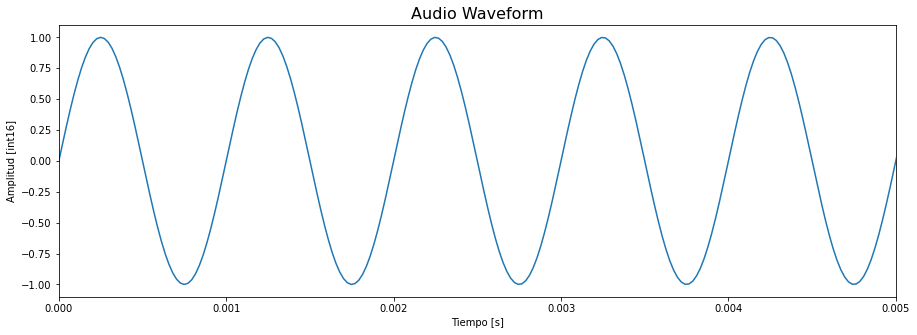

In [99]:
visualizar(x,F)
plt.xlim((0, 0.005))

### pyaudio + wave

In [89]:
import pyaudio
import wave

chunk = 1024  # Record in chunks of 1024 samples
sample_format = pyaudio.paInt16  # 16 bits per sample
channels = 2
fs = 44100  # Record at 44100 samples per second
seconds = 3
filename = "../audio/output.wav"

p = pyaudio.PyAudio()  # Create an interface to PortAudio

print('Recording')

stream = p.open(format=sample_format,
                channels=channels,
                rate=fs,
                frames_per_buffer=chunk,
                input=True)

frames = []  # Initialize array to store frames

# Store data in chunks for 3 seconds
for i in range(0, int(fs / chunk * seconds)):
    data = stream.read(chunk)
    frames.append(data)

# Stop and close the stream 
stream.stop_stream()
stream.close()
# Terminate the PortAudio interface
p.terminate()

print('Finished recording')

# Save the recorded data as a WAV file
wf = wave.open(filename, 'wb')
wf.setnchannels(channels)
wf.setsampwidth(p.get_sample_size(sample_format))
wf.setframerate(fs)
wf.writeframes(b''.join(frames))
wf.close()

Recording
Finished recording


In [101]:
data = reproducir(filename)

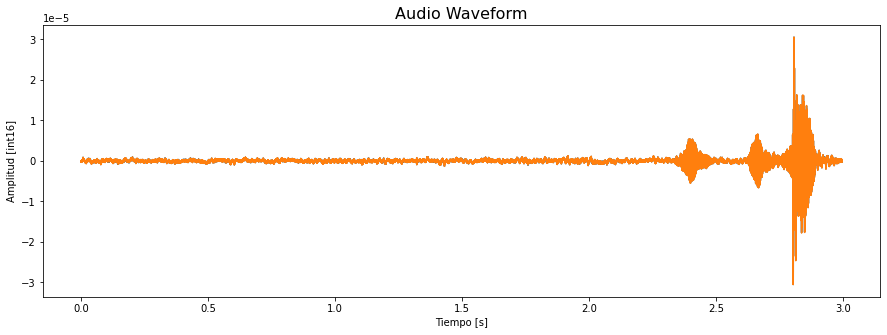

In [102]:
visualizar(data,F)

## Referencias

 * Nagesh Singh Chauhan, https://www.kdnuggets.com/2020/02/audio-data-analysis-deep-learning-python-part-1.html
 * Joska de Langen, https://realpython.com/playing-and-recording-sound-python/

## Licencia

<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Licencia de Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br />Este documento se destribuye con una <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">licencia Atribución CompartirIgual 4.0 Internacional de Creative Commons</a>.

Material adaptado del curso [Introducción a Python](https://github.com/infiniemlabs-acustica/python_introduccion)

© 2020. Infiniem Labs Acústica. infiniemlab.dsp@gmail.com (CC BY-SA 4.0))